Import Library

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

Membuat kelas untuk LDA

In [10]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1] #Variabel untuk Feature
        class_labels = np.unique(y) #Variabel untuk kelas (Target)

        # Rumus untuk Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)*transpose(X_c - mean_X_c) )

        # Rumus untuk Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)*transpose(mean_X_c - mean_overall))

        mean_overall = np.mean(X, axis=0) #Menentukan nilai mean overall
        # print("Mean Overall: ", mean_overall)
        SW = np.zeros((n_features, n_features)) #Membuat dimensi matriks untuk SW
        SB = np.zeros((n_features, n_features)) #Membuat dimensi matriks untuk SB
        for c in class_labels: 
            X_c = X[y == c] #Feature data yang dibuat menjadi matriks
            # print("x_c: \n",X_c)
            mean_c = np.mean(X_c, axis=0) #Menentukan mean untuk feature
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c ).T.dot((X_c - mean_c)) #Menentukan nilai SW
            # print("Minus:", minus)
            # print("SW1:",SW)

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0] #Menentukan nilai N
            # print("n_c",n_c)
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1) #Menentukan Mean Difference
            # print("Mean Diff: \n", mean_diff)
            SB += n_c * (mean_diff).dot(mean_diff.T) #Menentukan nilai SB
            # print("SB dalem: ",SB)
            # print("Mean C: \n", mean_c)

        
        print("SW: ", SW) #Menampilkan nilai SW akhir
        print("SB: ", SB) #Menampilkan nilai SB akhir

        # Mencari nilai SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        print("A:\n", A)
        # Menentukan eigenvalues dan eigenvectors dari SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, lakukan transpose untuk mempermudah
        # Urutkan eigenvalues dari tinggi hingga rendah
        eigenvectors = eigenvectors.T #Transpose eigenvectors
        idxs = np.argsort(abs(eigenvalues))[::-1] #Mengurutkan eigenvalues
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        print("Eigen Vector:\n",eigenvectors)
        print("Eigen Values\n", eigenvalues)
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

SW:  [[ 6.5 -1.5]
 [-1.5  5. ]]
SB:  [[0.25 0.5 ]
 [0.5  1.  ]]
A:
 [[0.0661157  0.1322314 ]
 [0.11983471 0.23966942]]
Eigen Vector:
 [[-0.48307734 -0.87557768]
 [-0.89442719  0.4472136 ]]
Eigen Values
 [0.30578512 0.        ]
Shape of X: (4, 2)
Shape of transformed X: (4, 2)


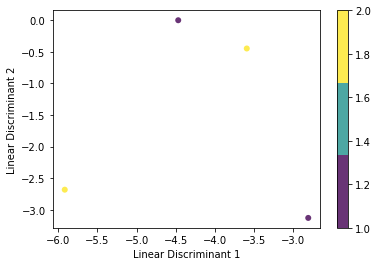

In [11]:
# Testing
if __name__ == "__main__":
    data = pd.read_csv("dataset2.csv") #Membaca Dataset
    X, y = data.drop("target", axis = 1), data.target
    X = np.array(X)

    # Project the data onto the 2 primary linear discriminants
    lda = LDA(2)
    lda.fit(X, y)
    X_projected = lda.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1, x2 = X_projected[:, 0], X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()
    plt.show()